### Feature Description
<table>
<tr><th>Feature Name</th><th>Definition</th></tr>
<tr><td>Pregnencies</td><td> Number of times pregnent </td></tr>
<tr><td>Glucose</td> <td>Plasma glucose concentration a 2 hours in an oral 
glucose tolerance test</td></tr>
<tr><td>Blood Pressure </td><td>Diastolic blood pressure (mm Hg)</td></tr>
<tr><td>Skin Thickness </td><td>Triceps skin fold thickness (mm) </td></tr>
<tr><td>Insulin </td><td>2-Hour serum insulin (mu U/ml)</td></tr>
<tr><td>BMI </td><td>Body Mass Index</td></tr>
<tr><td>DiabetesPedigreeFunction </td><td>Values Computed based on Diabetes pedigree function</td></tr>
<tr><td>Age </td><td>Age (years)</td></tr>
<tr><td>Outcome</td><td>0 or 1</td></tr>
</table>

<ol>
<li>Read the dataset 'diabetes.csv'</li>
<li>Remove the null values if any</li>
<li>Represent Outcome count on a Countplot and Outcome percentage on a pie chart</li>
<li>Represent Glucose vs Blood Pressure on a scatterchart based on Outcome</li>
<li>Represent Blood Pressure vs Insulin on a scatterchart based on Outcome</li>
<li>Represent SkinThickness vs BMI on a scatterchart based on Outcome</li>
<li>Replace all the 0 values present in Glucose, BloodPressure, SkinThickness, Insulin and  BMI columns with their mean respectively</li>
<li>Considering all the columns as independent features and the 'Outcome' column as dependent feature, split the dataset into training and testing dataset with test size 25%</li>
<li>Apply Decision Tree classifier and predict the 'Outcome' column for testing dataset</li>
<li>Find accuracy score for training and testing dataset</li>
<li>Generate confusion matrix</li>
<li>Generate Classification Report</li>
<li>Apply Random Forest classifier and predict the 'Outcome' column for testing dataset</li>
<li>Repeat Q10-Q12 for RandomForest as well</li>    
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 1. Read the dataset 'diabetes.csv'
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# 2. Remove the null values if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


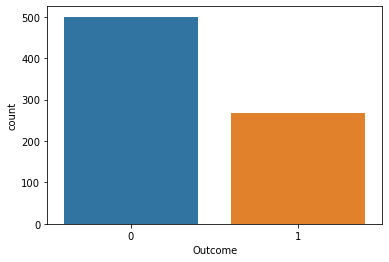

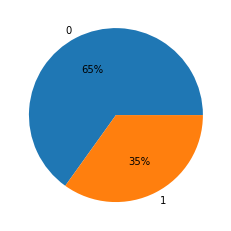

In [4]:
# 3. Represent Outcome count on a Countplot and Outcome percentage on a pie chart
sns.countplot(x=df.Outcome);
plt.figure()
plt.pie(x=df['Outcome'].value_counts(),labels=['0','1'],autopct='%2.0f%%');

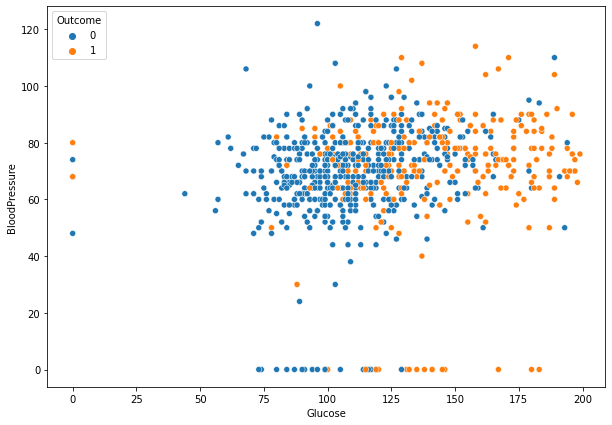

In [5]:
# 4.Represent Glucose vs Blood Pressure on a scatterchart based on Outcome
plt.figure(figsize=(10,7))
sns.scatterplot(x=df.Glucose,y=df.BloodPressure,hue=df.Outcome);

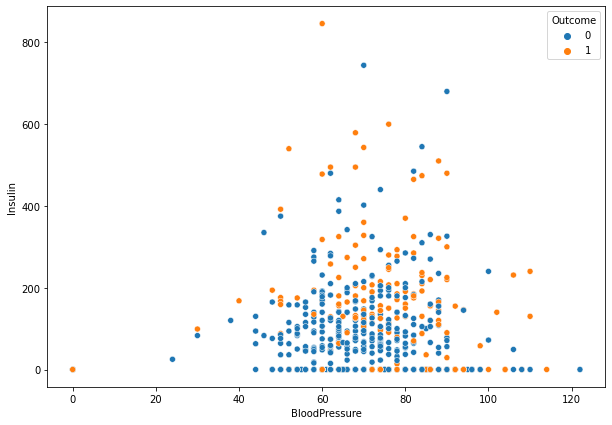

In [6]:
# 5. Represent Blood Pressure vs Insulin on a scatterchart based on Outcome
plt.figure(figsize=(10,7))
sns.scatterplot(x=df.BloodPressure,y=df.Insulin,hue=df.Outcome);

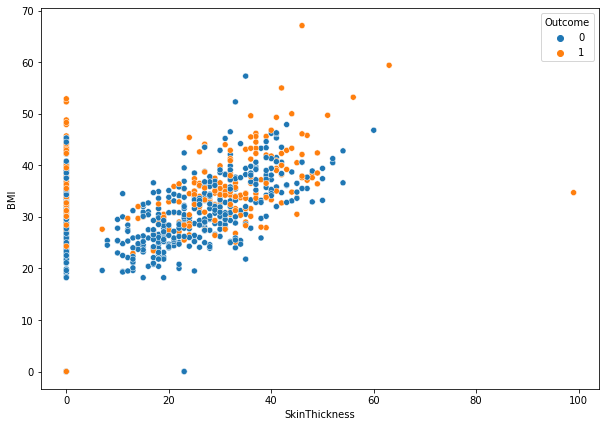

In [7]:
# 6. Represent SkinThickness vs BMI on a scatterchart based on Outcome
plt.figure(figsize=(10,7))
sns.scatterplot(x=df.SkinThickness,y=df.BMI,hue=df.Outcome);

In [8]:
# 7. Replace all the 0 values present in Glucose, BloodPressure, SkinThickness, Insulin and BMI columns with their mean 
# respectively
df.Glucose = df.Glucose.astype(str).replace({'0':df.Glucose.mean()}).astype(int)
df.BloodPressure = df.BloodPressure.astype(str).replace({'0':df.BloodPressure.mean()}).astype(int)
df.SkinThickness = df.SkinThickness.astype(str).replace({'0':df.SkinThickness.mean()}).astype(int)
df.Insulin = df.Insulin.astype(str).replace({'0':df.Insulin.mean()}).astype(int)
df.BMI = df.BMI.astype(str).replace({'0':df.BMI.mean()}).astype(float)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.6,0.627,50,1
1,1,85,66,29,79,26.6,0.351,31,0
2,8,183,64,20,79,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# 8. Considering all the columns as independent features and the 'Outcome' column as dependent feature, split the dataset 
# into training and testing dataset with test size 25%
from sklearn.model_selection import train_test_split
X = df.drop(['Outcome'],axis=1)
y = df.Outcome
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [11]:
# 9. Apply Decision Tree classifier and predict the 'Outcome' column for testing dataset
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [12]:
# 10. Find accuracy score for training and testing dataset
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.671875


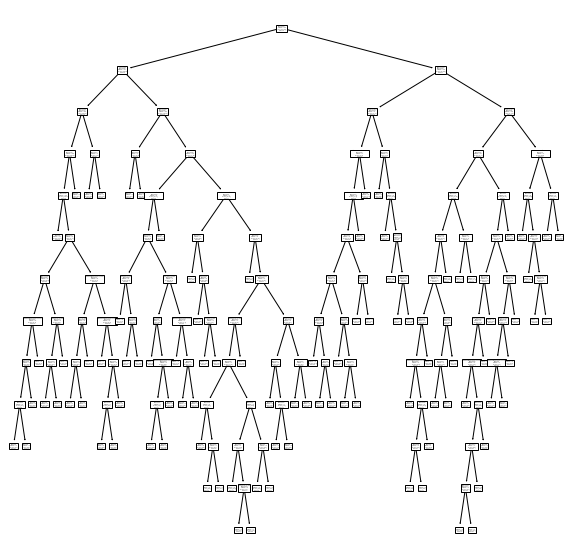

In [13]:
from sklearn import tree
plt.figure(figsize=(10,10))
fn = df.columns
cn = ['0','1']
tree.plot_tree(dt,feature_names=fn,class_names=cn);

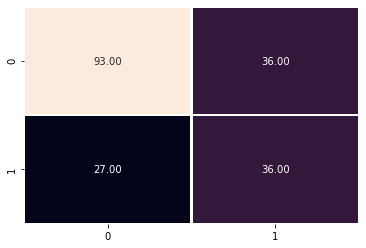

In [14]:
# 11. Generate confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True,
            fmt='.2f',
            cbar=False,
            linewidth=1.5);

In [15]:
# 12. Generate Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       129
           1       0.50      0.57      0.53        63

    accuracy                           0.67       192
   macro avg       0.64      0.65      0.64       192
weighted avg       0.68      0.67      0.68       192



In [16]:
# 13. Apply Random Forest classifier and predict the 'Outcome' column for testing dataset
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_preds = rf.predict(X_test)

In [17]:
# 14. Repeat Q10-Q12 for RandomForest as well
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

1.0
0.765625


In [18]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=930211272),
 DecisionTreeClassifier(max_features='auto', random_state=1815668617),
 DecisionTreeClassifier(max_features='auto', random_state=1903599973),
 DecisionTreeClassifier(max_features='auto', random_state=213035555),
 DecisionTreeClassifier(max_features='auto', random_state=1036097761),
 DecisionTreeClassifier(max_features='auto', random_state=1670957995),
 DecisionTreeClassifier(max_features='auto', random_state=481713336),
 DecisionTreeClassifier(max_features='auto', random_state=649562681),
 DecisionTreeClassifier(max_features='auto', random_state=1649904273),
 DecisionTreeClassifier(max_features='auto', random_state=732113817),
 DecisionTreeClassifier(max_features='auto', random_state=1302427413),
 DecisionTreeClassifier(max_features='auto', random_state=221677261),
 DecisionTreeClassifier(max_features='auto', random_state=596177506),
 DecisionTreeClassifier(max_features='auto', random_state=1419431420),
 DecisionTree

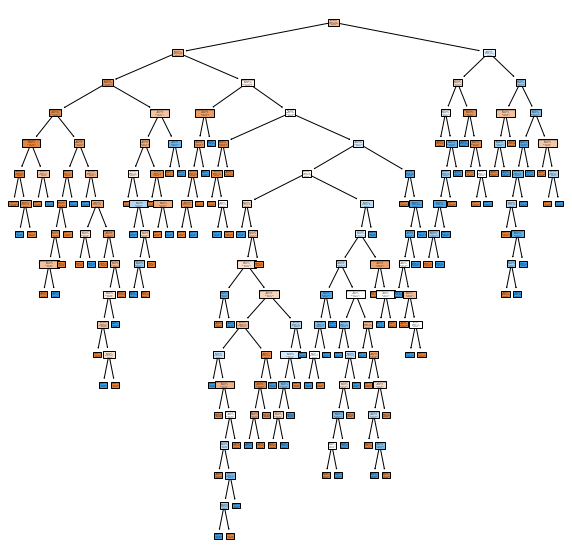

In [19]:
from sklearn import tree
plt.figure(figsize=(10,10))
fn = X.columns
cn = ['0','1']
tree.plot_tree(rf.estimators_[0],feature_names=fn,class_names=cn,filled=True);

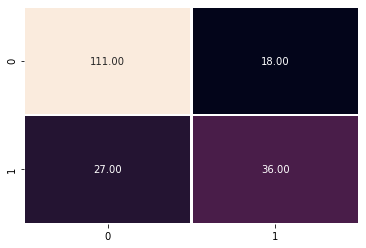

In [20]:
sns.heatmap(confusion_matrix(y_test,y_preds),
            cbar=False,
            linewidth=1.5,
            annot=True,
            fmt='.2f');

In [21]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       129
           1       0.67      0.57      0.62        63

    accuracy                           0.77       192
   macro avg       0.74      0.72      0.72       192
weighted avg       0.76      0.77      0.76       192

